In [4]:
# Common libraries
import pandas as pd
import numpy as np

In [5]:
# Replace the paths of the train and test data with the local path
trainPath = r'D:\Study\Applied Machine Learning\Project\Datasets-20191109\train_imperson_without4n7_balanced_data.csv'
testPath = r'D:\Study\Applied Machine Learning\Project\Datasets-20191109\test_imperson_without4n7_balanced_data.csv'

In [6]:
def Preprocessing(path):
    origSet = pd.read_csv(path)
    
    # List of columns for the data set, except frame.time_epoch and frame.time_relative
    colList = ['frame.interface_id','frame.dlt','frame.offset_shift','frame.time_delta','frame.time_delta_displayed','frame.len','frame.cap_len','frame.marked','frame.ignored','radiotap.version','radiotap.pad','radiotap.length','radiotap.present.tsft','radiotap.present.flags','radiotap.present.rate','radiotap.present.channel','radiotap.present.fhss','radiotap.present.dbm_antsignal','radiotap.present.dbm_antnoise','radiotap.present.lock_quality','radiotap.present.tx_attenuation','radiotap.present.db_tx_attenuation','radiotap.present.dbm_tx_power','radiotap.present.antenna','radiotap.present.db_antsignal','radiotap.present.db_antnoise','radiotap.present.rxflags','radiotap.present.xchannel','radiotap.present.mcs','radiotap.present.ampdu','radiotap.present.vht','radiotap.present.reserved','radiotap.present.rtap_ns','radiotap.present.vendor_ns','radiotap.present.ext','radiotap.mactime','radiotap.flags.cfp','radiotap.flags.preamble','radiotap.flags.wep','radiotap.flags.frag','radiotap.flags.fcs','radiotap.flags.datapad','radiotap.flags.badfcs','radiotap.flags.shortgi','radiotap.datarate','radiotap.channel.freq','radiotap.channel.type.turbo','radiotap.channel.type.cck','radiotap.channel.type.ofdm','radiotap.channel.type.2ghz','radiotap.channel.type.5ghz','radiotap.channel.type.passive','radiotap.channel.type.dynamic','radiotap.channel.type.gfsk','radiotap.channel.type.gsm','radiotap.channel.type.sturbo','radiotap.channel.type.half','radiotap.channel.type.quarter','radiotap.dbm_antsignal','radiotap.antenna','radiotap.rxflags.badplcp','wlan.fc.type_subtype','wlan.fc.version','wlan.fc.type','wlan.fc.subtype','wlan.fc.ds','wlan.fc.frag','wlan.fc.retry','wlan.fc.pwrmgt','wlan.fc.moredata','wlan.fc.protected','wlan.fc.order','wlan.duration','wlan.ra','wlan.da','wlan.ta','wlan.sa','wlan.bssid','wlan.frag','wlan.seq','wlan.bar.type','wlan.ba.control.ackpolicy','wlan.ba.control.multitid','wlan.ba.control.cbitmap','wlan.bar.compressed.tidinfo','wlan.ba.bm','wlan.fcs_good','wlan_mgt.fixed.capabilities.ess','wlan_mgt.fixed.capabilities.ibss','wlan_mgt.fixed.capabilities.cfpoll.ap','wlan_mgt.fixed.capabilities.privacy','wlan_mgt.fixed.capabilities.preamble','wlan_mgt.fixed.capabilities.pbcc','wlan_mgt.fixed.capabilities.agility','wlan_mgt.fixed.capabilities.spec_man','wlan_mgt.fixed.capabilities.short_slot_time','wlan_mgt.fixed.capabilities.apsd','wlan_mgt.fixed.capabilities.radio_measurement','wlan_mgt.fixed.capabilities.dsss_ofdm','wlan_mgt.fixed.capabilities.del_blk_ack','wlan_mgt.fixed.capabilities.imm_blk_ack','wlan_mgt.fixed.listen_ival','wlan_mgt.fixed.current_ap','wlan_mgt.fixed.status_code','wlan_mgt.fixed.timestamp','wlan_mgt.fixed.beacon','wlan_mgt.fixed.aid','wlan_mgt.fixed.reason_code','wlan_mgt.fixed.auth.alg','wlan_mgt.fixed.auth_seq','wlan_mgt.fixed.category_code','wlan_mgt.fixed.htact','wlan_mgt.fixed.chanwidth','wlan_mgt.fixed.fragment','wlan_mgt.fixed.sequence','wlan_mgt.tagged.all','wlan_mgt.ssid','wlan_mgt.ds.current_channel','wlan_mgt.tim.dtim_count','wlan_mgt.tim.dtim_period','wlan_mgt.tim.bmapctl.multicast','wlan_mgt.tim.bmapctl.offset','wlan_mgt.country_info.environment','wlan_mgt.rsn.version','wlan_mgt.rsn.gcs.type','wlan_mgt.rsn.pcs.count','wlan_mgt.rsn.akms.count','wlan_mgt.rsn.akms.type','wlan_mgt.rsn.capabilities.preauth','wlan_mgt.rsn.capabilities.no_pairwise','wlan_mgt.rsn.capabilities.ptksa_replay_counter','wlan_mgt.rsn.capabilities.gtksa_replay_counter','wlan_mgt.rsn.capabilities.mfpr','wlan_mgt.rsn.capabilities.mfpc','wlan_mgt.rsn.capabilities.peerkey','wlan_mgt.tcprep.trsmt_pow','wlan_mgt.tcprep.link_mrg','wlan.wep.iv','wlan.wep.key','wlan.wep.icv','wlan.tkip.extiv','wlan.ccmp.extiv','wlan.qos.tid','wlan.qos.priority','wlan.qos.eosp','wlan.qos.ack','wlan.qos.amsdupresent','wlan.qos.buf_state_indicated','wlan.qos.bit4','wlan.qos.txop_dur_req','wlan.qos.buf_state_indicated','data.len','class']
    
    # Replace columns numbers with feature names and store in a new data set
    origSetCols = origSet.columns.tolist()
    nameDictionary = dict(zip(origSetCols, colList))
    # New set with feature names
    origSetWithColNames = origSet.rename(columns=nameDictionary)
    
    # Identify columns with blank values
    colsWithBlanks = origSetWithColNames.columns[origSetWithColNames.isnull().any()].tolist()
    
    # Replace blanks, if any, with medians
    if len(colsWithBlanks) > 0:
        origSetWithColNames.fillna(origSetWithColNames.median())
    else:
        pass
    
    # Change categorical features to numeric features, if any
    colTypes = [str(w) for w in origSetWithColNames.dtypes.tolist()]
    
    if 'object' in colTypes:
        objCols = origSetWithColNames.columns[origSetWithColNames.dtypes == object].tolist()
        from sklearn.preprocessing import LabelEncoder, OneHotEncoder
        le = LabelEncoder()
        origSetWithColNames.loc[:, objCols] = le.fit_transform(origSetWithColNames.loc[:, objCols])
        ohe = OneHotEncoder(categorical_features=[origSetWithColNames.columns.get_loc(c) for c in objCols])
        origSetWithColNames = ohe.fit_transform(origSetWithColNames)
    else:
        pass
    
    # Standardize the data using RobustScaler
    origSetWithColNamesWithoutClass = origSetWithColNames.iloc[:, :-1]
    classSet = origSetWithColNames.iloc[:, -1]
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    finalSet = pd.DataFrame(scaler.fit_transform(origSetWithColNamesWithoutClass), columns=colList[:-1])
    finalSet['class'] = classSet
    
    return finalSet

In [7]:
def FeatureSelection(data):
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    
    # Define our features and our target classifier
    X = data.iloc[:,:-1]
    Y = data.iloc[:,-1]

    # First, remove all features with zero variance i.e. features with constant values. 
    X = X.loc[:,X.apply(pd.Series.nunique) != 1]

    # RFE with logistic regression
    model = LogisticRegression()

    # Try 10 features
    rfe_log = RFE(model, 10)
    fit_rfe_log = rfe_log.fit(X, Y)
    # Create list with names of features
    rfe_log_features = X.columns[fit_rfe_log.get_support()]

    # Print names of selected features
    for f in rfe_log_features:
        print(f)

    # Create data frame with only the relevant features
    cols_to_use = rfe_log_features.union(['class'])
    fs_output = data[cols_to_use]
    
    # Create data frame with test data and relevant features
    test = Preprocessing(testPath)
    fs_test = test[cols_to_use]
    
    return fs_output, fs_test

In [13]:
def ModelSelection(fsdata):
    # import models
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.dummy import DummyClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    
    # load training dataset
    dataset = fsdata
    df = dataset.values
    X  = df[:,0:-1]
    Y = df[:,-1]
    
    
    # run against dummy classifier
    dc = (DummyClassifier(strategy='stratified', random_state=0))
    dkf = KFold(n_splits=5, shuffle=False, random_state=None)
    dcv = cross_val_score(dc, X, Y, cv=dkf, scoring='accuracy')
    dcvm = dcv.mean()
    print (dcvm)
    # prepare models
    models = [( LogisticRegression(solver='lbfgs')),
    ( LinearDiscriminantAnalysis()),
    ( KNeighborsClassifier()),
    ( DecisionTreeClassifier()),
    ( GaussianNB()),
    ( SVC(kernel='rbf', random_state=0, gamma=1, C=1)),
    (RandomForestClassifier(n_estimators=100))]

    names = ['LR','LDA','KNN','DT','NB','SVM','RF']


    scores = []
    scores2 = []
    scorevsdefault = []
    # use kfold cross-validation to test models
    for model in models:
       kf = KFold(n_splits=5, shuffle=False, random_state=None)
       cv = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')
       scores.append(cv.mean())
       scores2.append(cv.std())
       scorevsdefault.append('%' + str((float(cv.mean()- dcvm)/float(cv.mean()))*100))                         
    results = [list(a) for a in zip(names, scores, scores2, scorevsdefault)]
    print (results)

In [9]:
def ModelTuning(trainData, testData):
    data_train = trainData
    data_train.shape
    
    data_train.head()
    
    # split values into inputs and outputs.
    values_train = data_train.values
    X_train = values_train[:,1:11]
    y_train = values_train[:,0]
    
    data_train.shape
    
    # Test data.
    data_test = testData
    
    # split values into inpits and outputs.
    values_test = data_test.values
    X_test = values_test[:,1:11]
    y_test = values_test[:,0]
    
    data_test.shape
    
    # RANDOM FOREST IS THE BEST PERFORMING ALGORYTHM
    
    ## RF with default hyperparameters
    
    # Initiate a RF model using default hyperparameters.
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    
    # Train model on train data.
    rf.fit(X_train, y_train)
    
    # Check model accuracy on the TEST set.
    rf_score = rf.score(X_test, y_test)
    print(rf_score)
    
    # Build confusion matrix.
    from sklearn.metrics import confusion_matrix
    rf_cm = confusion_matrix(y_test, rf.predict(X_test))
    print(rf_cm)
    
    ## RF hyperparameters tuning (Random Search)
    
    # Define a grid of hyperparameters.
    rf_params = { 'n_estimators': [1, 5, 10, 30, 50, 100, 200, 500], 
                 'max_depth': [None, 1, 2, 4, 8, 20, 50, 100], 
                 'min_samples_leaf': [1, 5, 10, 50, 100], 
                 'max_features': [None, 'auto', 'log2']
                }
    
    # Run random search.
    from sklearn.model_selection import RandomizedSearchCV
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=25, 
                                   cv = 3, n_jobs=-1, random_state = 2019)
    
    import time
    start_time = time.time()
    rf_random.fit(X_train, y_train)
    finish_time = time.time()
    
    # Summarize results
    print("Best: %f using %s" % (rf_random.best_score_, rf_random.best_params_))
    print("Execution time: " + str((finish_time - start_time)))
    
    # Apply best values of hyperparameters to the model.
    rf_tuned = rf_random.best_estimator_
    
    # Train the tuned model on TRAIN set and check the accuracy 
    ##Added a couple of lines to capture the time to build the trained model
    start_time = time.time()
    rf_tuned.fit(X_train, y_train)
    finish_time = time.time()
    print("Time to build model: " + str((finish_time - start_time)))
    
    rf_tuned_score = rf_tuned.score(X_test,y_test)
    print(rf_tuned_score)
    
    # Build confusion matrix.
    start_time = time.time()
    rf_tuned_cm = confusion_matrix(y_test, rf_tuned.predict(X_test))
    finish_time = time.time()
    print(rf_tuned_cm)
    ##Added a couple of lines to capture the time to build the test model
    print("Time to test model: " + str((finish_time - start_time)))
    
    ###input for model evaluator
    data = pd.DataFrame(y_test, columns = ['label'])
    data['predicted'] = rf_tuned.predict(X_test)
    data['probability'] = rf_tuned.predict_proba(X_test)[:, 1]
    
    ## RF tuning Results
    
    print("RF default hyperparameters test accuracy: ", rf_score,', parameters: ', '\n', rf.get_params())
    print('Confusion matrix: ', '\n', rf_cm)
    print("RF tuned hyperparameters test accuracy: ", rf_tuned_score,', parameters: ', '\n', rf_tuned.get_params())
    print('Confusion matrix: ', '\n', rf_tuned_cm)
          
    return data

In [10]:
##Evaluates the performance of a binary classifier against labelled data.
# @param model_name - string of model name
# @param data - a dataframe containing 3 columns: class (binary values), predicted(binary values) and probability (the predicition the model has made for each value, prior to converting to a binary classification, number between 0 and 1).
          
# @returns - Confusion matrix plot, ROC curve plot, and a small report.    
    
def ModelEvaluator(model_name,data): 
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import FixedLocator, FixedFormatter

   #partition processed data into vectors
    actualClass = data.label
    predictedClass = data.predicted
    probability = data.probability 
    
    #build a confusion matrix
    cm = confusion_matrix(actualClass, predictedClass, labels = [0,1])
    
    TruePositive = cm[1, 1]
    TrueNegative = cm[0,0]
    FalsePositive = cm[0,1]
    FalseNegative = cm[1,0]
    
    numberOfPositives = TruePositive + FalseNegative
    numberOfNegatives = TrueNegative + FalsePositive
    
    #calculate the Null accuracy
    null_accuracy = 1 - actualClass.mean()
    
    #define the model accuracy
    model_accuracy = metrics.accuracy_score(actualClass, predictedClass)
    
    #Generate a metrics report
    report = metrics.classification_report(actualClass, predictedClass, output_dict = True)
  
    #calculate the model performance over the null accuracy
    performance_over_null = model_accuracy - null_accuracy
    
    #Calculate the Specificity of the model 
    specificity = TrueNegative / (TrueNegative + FalsePositive)
    
    #Calculate the True positive rate, false positive rate, and thresholds to plot a rock curve
    fpr, tpr, thresholds = metrics.roc_curve(actualClass, probability)
    
    #Calculate the Area under the ROC Curve
    rocAuc = metrics.roc_auc_score(actualClass, probability)
    
    #Calculate the Michaels Correlation Coefficient
    mcc = metrics.matthews_corrcoef(actualClass, predictedClass)
    
    #generate figure
    fig = plt.figure(figsize = (10, 5))
    spec = gridspec.GridSpec(ncols=2, nrows=2, wspace=0.5, hspace = 0.8, width_ratios=[1, 1], height_ratios = [1, 20],  figure=fig)
    
    text = fig.add_subplot(spec[0,0])
    text.axis('off')
    text. set_title('%s' % (model_name), fontweight = 'bold', fontsize = 16) 
    text.text(0,0,'The performance of this model over the null accuracy is %2.2f%%\nModel Sensitivity: %2.6f%% \nModel Specificity: %2.6f%% \nModel F1 Score: %2.6f \nMatthews Correlation Coeffiecient: %2.6f' 
      % ((performance_over_null *100), (report['1.0']['recall']*100), (specificity*100), (report['1.0']['f1-score']), mcc), bbox=dict(facecolor='white'), verticalalignment="top")
    
    
    #plot confusion matrix in pos 0,0
    confusionMatrixLabels = ['Normal Traffic', 'Intrusion']
    confusionMatrixColourMap = plt.cm.Blues
    confusionMatrix = fig.add_subplot(spec[1,0])
    confusionMatrix.set_aspect('equal')
    confusionMatrix.imshow(cm, interpolation = 'nearest', cmap = confusionMatrixColourMap)
    confusionMatrix.set(ylabel ='True class', xlabel ='Predicted class')
    #confusionMatrix.xlabel(labelpad=5)
            
    confusionMatrix.set_xticks(np.arange(0,2))
    formatter = FixedFormatter(['Normal Traffic', 'Intrusion'])
    locator = FixedLocator([0,1])
    
    confusionMatrix.yaxis.set_major_formatter(formatter)
    confusionMatrix.yaxis.set_major_locator(locator)
    confusionMatrix.xaxis.set_major_formatter(formatter)
    confusionMatrix.xaxis.set_major_locator(locator)
    
    #confusionMatrix.set_yticks(np.arange(0,2))
    #confusionMatrix.set_xticklabels(np.arange(0,1), confusionMatrixLabels, fontdict = None)
    
    tot = sum(data.label)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            confusionMatrix.text(j, i, (format(cm[i, j])),ha ='center', va="baseline", color="white" if cm[i,j] > (0.5*tot) else 'black', size = 'larger')
    
   
    cmLabels = ['TN', 'FP', 'FN', 'TP' ]
    a = 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            confusionMatrix.text(j + 0.3, i + 0.4, (cmLabels[a]), ha ='center', va="baseline", color="white" if cm[i,j] >(0.5*tot) else 'black', size = 'larger')
            if a < 4:
                a += 1
    a=0          
    for i in range(cm.shape[a]):
        if a == 0:
            confusionMatrix.text(j+0.8, i, ('Total:\n %d' % (numberOfNegatives)), ha ='center', va="center", color = 'black', size = 'larger')
            a += 1
        else:
            confusionMatrix.text(j+0.8, i, ('Total:\n %d' % (numberOfPositives)), ha ='center', va="center", color = 'black', size = 'larger')
    
    #plot roc curve in position 0,1 
    rocCurve = fig.add_subplot(spec[1, 1])
    rocCurve.set_aspect('equal')
    rocCurve.plot(fpr, tpr, color='red', lw=2, label = 'ROC area = %0.5f)' % rocAuc )
    rocCurve.set(xlabel = 'False Positive Rate (1-Specifcity)', ylabel = 'True Positive Rate (Sensitivity)' )
    rocCurve.legend(loc="lower right")
        
    
    #print(report)
    #path = '/Users/scotttasker/Documents/Birkbeck/aml/'
    #fig.savefig(path + '%s.pdf' % (model_name), dpi = 300) 

In [11]:
# Preprocess data
trainData = Preprocessing(trainPath)

FileNotFoundError: [Errno 2] File b'D:\\Study\\Applied Machine Learning\\Project\\Datasets-20191109\\train_imperson_without4n7_balanced_data.csv' does not exist: b'D:\\Study\\Applied Machine Learning\\Project\\Datasets-20191109\\train_imperson_without4n7_balanced_data.csv'

In [12]:
# Feature select train and test sets
FSTrainData, FSTestData = FeatureSelection(trainData)

NameError: name 'trainData' is not defined

In [10]:
# Print models and their scores
ModelSelection(FSTrainData)

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[['LR', 0.990870057690322, 0.005848491334589655], ['LDA', 0.9914060444927492, 0.010878804245150116], ['KNN', 0.999845428283774, 0.00013825726168107408], ['DT', 0.9966922519222923, 0.006359584897542347], ['NB', 0.9744757576067775, 0.02393481229781441], ['SVM', 0.9887474144778705, 0.0077571060754268095], ['DC', 0.9784633774278912, 4.438664599870634e-07], ['RF', 0.9950743623922016, 0.00644555940880066]]


C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
# Show results
tunedOutput = ModelTuning(FSTrainData, FSTestData)

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9761442302903531
[[19124   955]
 [    3 20076]]
Best: 0.987501 using {'n_estimators': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}
Execution time: 39.68387222290039
Time to build model: 0.1326451301574707
0.9761442302903531
[[19124   955]
 [    3 20076]]
Time to test model: 0.04684019088745117
RF default hyperparameters test accuracy:  0.9761442302903531 , parameters:  
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Confusion matrix:  
 [[19124   955]
 [    3 20076]]
RF tuned hyperparameters test accuracy:  0.9761442302903531 , parameters:  
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_featur

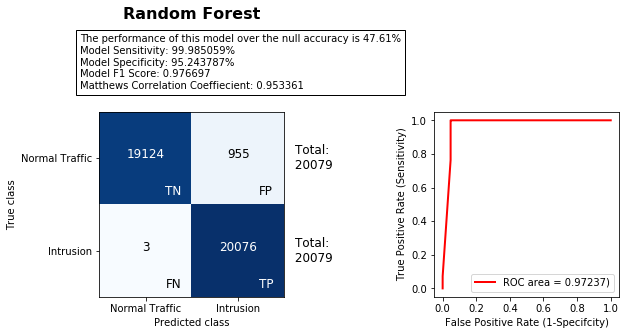

In [13]:
# Show evaluation
ModelEvaluator('Random Forest', tunedOutput)